<a href="https://colab.research.google.com/github/21-10-4/zxing/blob/master/01basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1、Linear Regression

Epoch [5/60], Loss: 25.0311
Epoch [10/60], Loss: 10.2432
Epoch [15/60], Loss: 4.2524
Epoch [20/60], Loss: 1.8254
Epoch [25/60], Loss: 0.8422
Epoch [30/60], Loss: 0.4439
Epoch [35/60], Loss: 0.2825
Epoch [40/60], Loss: 0.2171
Epoch [45/60], Loss: 0.1907
Epoch [50/60], Loss: 0.1799
Epoch [55/60], Loss: 0.1756
Epoch [60/60], Loss: 0.1738


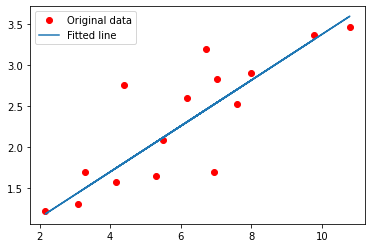

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

# 2、logistic regression

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data',train=True,transform=transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',train=False,transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,shuffle=False)

# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Epoch [1/5], Step [100/600], Loss: 2.2151
Epoch [1/5], Step [200/600], Loss: 2.1059
Epoch [1/5], Step [300/600], Loss: 2.0614
Epoch [1/5], Step [400/600], Loss: 1.9465
Epoch [1/5], Step [500/600], Loss: 1.8881
Epoch [1/5], Step [600/600], Loss: 1.8024
Epoch [2/5], Step [100/600], Loss: 1.7328
Epoch [2/5], Step [200/600], Loss: 1.7272
Epoch [2/5], Step [300/600], Loss: 1.6030
Epoch [2/5], Step [400/600], Loss: 1.5989
Epoch [2/5], Step [500/600], Loss: 1.5202
Epoch [2/5], Step [600/600], Loss: 1.5393
Epoch [3/5], Step [100/600], Loss: 1.4167
Epoch [3/5], Step [200/600], Loss: 1.3276
Epoch [3/5], Step [300/600], Loss: 1.3674
Epoch [3/5], Step [400/600], Loss: 1.3305
Epoch [3/5], Step [500/600], Loss: 1.3252
Epoch [3/5], Step [600/600], Loss: 1.1877
Epoch [4/5], Step [100/600], Loss: 1.2707
Epoch [4/5], Step [200/600], Loss: 1.1308
Epoch [4/5], Step [300/600], Loss: 1.1914
Epoch [4/5], Step [400/600], Loss: 

# 3、feedforward_neural_network

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 2.1770
Epoch [1/5], Step [200/600], Loss: 2.1241
Epoch [1/5], Step [300/600], Loss: 2.0236
Epoch [1/5], Step [400/600], Loss: 1.8979
Epoch [1/5], Step [500/600], Loss: 1.9051
Epoch [1/5], Step [600/600], Loss: 1.7310
Epoch [2/5], Step [100/600], Loss: 1.6575
Epoch [2/5], Step [200/600], Loss: 1.6994
Epoch [2/5], Step [300/600], Loss: 1.6212
Epoch [2/5], Step [400/600], Loss: 1.5187
Epoch [2/5], Step [500/600], Loss: 1.5062
Epoch [2/5], Step [600/600], Loss: 1.4983
Epoch [3/5], Step [100/600], Loss: 1.3715
Epoch [3/5], Step [200/600], Loss: 1.3486
Epoch [3/5], Step [300/600], Loss: 1.3829
Epoch [3/5], Step [400/600], Loss: 1.3824
Epoch [3/5], Step [500/600], Loss: 1.2807
Epoch [3/5], Step [600/600], Loss: 1.1995
Epoch [4/5], Step [100/600], Loss: 1.2235
Epoch [4/5], Step [200/600], Loss: 1.1373
Epoch [4/5], Step [300/600], Loss: 1.1499
Epoch [4/5], Step [400/600], Loss: 1.0993
Epoch [4/5], Step [500/600], Loss: 1.0652
Epoch [4/5], Step [600/600], Loss: